In [12]:
from IPython.display import Image
import numpy as np

#### Introduction to Bayesian

In the field of statistics, there are two primary frameworks. One is **frequentist** and the other is **Bayesian**.

- In frequentist statistics, probabilities are made of the world. So, whether something is actually correct or incorrect.
- In Bayesian statistics, probabilities are made in your mind. <br>

For example,<br><br>
I have four chocolates here, three are silver and one is purple, and I'm going to place them into two different bags. So, I had one bag that has two silver chocolates and one bag that has a silver chocolate and a purple chocolate. I'll put that behind my back, and I'll end up picking one of the bags. I don't actually know which bag I picked, but I'll pick one chocolate out of it. In that case, this chocolate is silver. That tells me something about these two bags. I know that there were two ways I could have picked a silver chocolate from the silver-silver bag, but only one way that I could've picked a silver chocolate from the silver-purple bag. In Bayesian statistics, I use the updated information to update the probability that this bag is either silver-silver or silver chocolate. So, I think that there's a two-thirds chance that this bag is silver-silver, and a one-third chance that this bag is silver-purple. In the frequentist framework because I know that I have two bags, this is 50 percent likely to be either bag or equally likely.

- **What's the difference between Python lists and numpy arrays?** 

So, the biggest difference is really what you need to store in them, and this is intuitive. Because if you think about lists, you can have many different data types, whereas with the numpy arrays, you can only have one data type. So when you're storing a list, you have to store the value but then also the data type for each value. Whereas in the numpy array, you store the value but then you only need to store the data type once. So, you can see that. This will save you memory. Numpy arrays are also often faster when you're using them in functions.
<br><br>
Another way they're different is what you can do with them. For example,

```python
import numpy as np

my_list = [1, 2, 3]
my_array = np.array(my_list)

# you can't do it with list because it gives an error
my_array / 3
```

#### Estimating a Population Proportion with Confidence
A hospital based in Ann Arbor MI, C.S. Mott Children's Hospital frequently conducts national polls on children's health. We will be looking at an example of children's safety precautions that parents use when driving.

- What proportion of parents report they use a car seat for all travel with their toddler?
    - Population: Parents with a toddler
    - Parameter of interest: A proportion
    - Construct a 95% confidence interval for the population proportion of parents reporting they use a car seat for all travel with their toddler
<br> &nbsp;
- A sample of 659 parents with a toddler was taken and asked if they used a car seat for all travel with their toddler.
    - 540 parents responded "yes" to this question.
    - 95% confidence interval = best estimate $\pm$ margin of error
    - 95% confidence interval = $\hat{p}$ $\pm$ margin of error
<br> &nbsp;
\begin{equation*}SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}\end{equation*}

In [2]:
# sample size
n = 659

# number of people saying yes
x = 540

# best estimate
p_hat = x / n

# margin of error
moe = 1.96 * np.sqrt((p_hat * (1 - p_hat)) / n)

p_hat - moe, p_hat + moe

(0.7900537499137914, 0.8487929875672404)

We estimate, with 95% confidence, the population proportion of parents with toddlers who report they use a car seat for all travel with their toddler is somewhere between 0.7900 and 0.8487.
***
Based on our sample of 659 parents with toddlers, with 95% confidence, we estimate between %79.0 and %84.9 of all such parents report they use a car seat for all travel with their toddler.

**Caution!!!** The confidence level refers to the confidence we have in the process we use to make our interval. Not as a probability after our interval was made but how confident we are about the statistical procedure that was used.

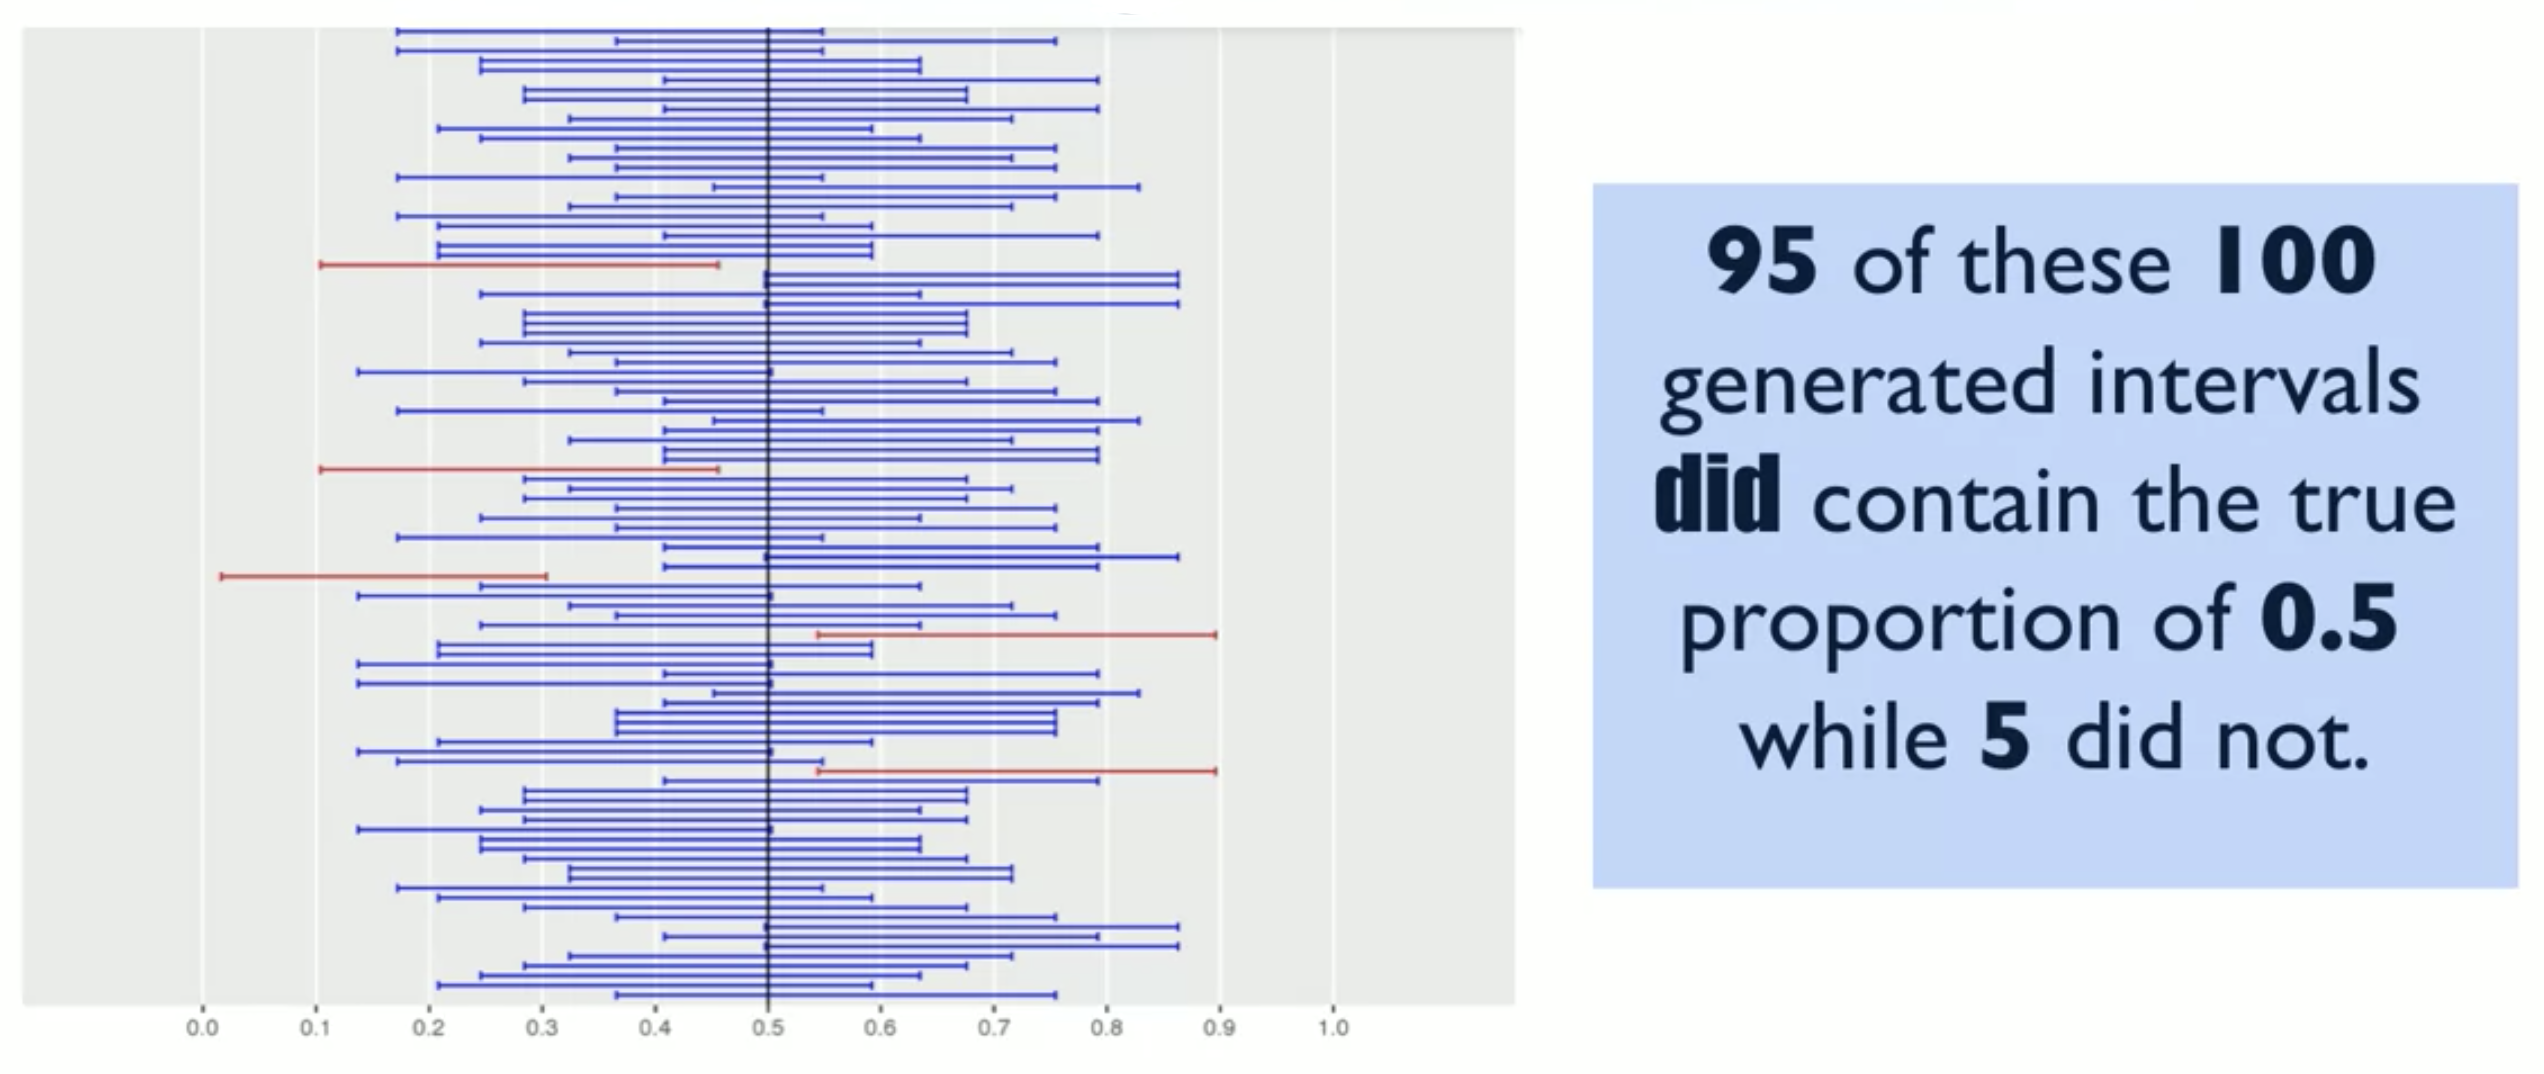

In [3]:
Image('images/example_5.png', width=800)

As you can see from the graph, with a 95% confidence level, we would except (in the long run) about 95% of the interval<ins>s</ins> to contain the true proportion.

##### Assumptions for a Single Population Proportion Confidence Interval

- Best Estimate - in order to get a reliable best estimate, we need a SIMPLE RANDOM SAMPLE
    - Simple Random Sample - a representative subset of the population made up of observations (or subjects) that have an equal probability of being chosen
- Margin of error - in order to use the critical z-value in our calculations, we need a *large enough sample size*
    - But what is large enough?
    - At least 10 of each response outcome (i.e. yes/no)

##### Conservative Approach & Sample Size Consideration
As you know, we defined SE based on the $\hat{p}$ value before. But what if $\hat{p}$ is not accurate? At this point, we want to maximize estimated standard error (SE). Which is maximized when $\hat{p}$=0.5. So, when we put 0.5 instead of $\hat{p}$ in the SE formula, it looks like as follows,

\begin{equation*}CSE = \frac{1}{2\sqrt{n}}\end{equation*}

And we can called that as **conservative standard error**.

In [4]:
# sample size
n = 659

# number of people saying yes
x = 540

# best estimate
p_hat = x / n

# margin of error
moe = 1.96 * (1 / (2 * np.sqrt(n)))

p_hat - moe, p_hat + moe

(0.7812479887710665, 0.8575987487099653)

Also, if we choose the multiplier as 2, the MoE (margin of error) formula looks like as follows,

\begin{equation*}MoE = \frac{1}{\sqrt{n}}\end{equation*}

The 2 in the denominator and the multiplier 2 cancel each other out. As we said before, sometimes we can use the 2 instead of 1.96 for the %95 confidence.

In [5]:
# sample size
n = 659

# number of people saying yes
x = 540

# best estimate
p_hat = x / n

# margin of error
moe = 1 / np.sqrt(n)

p_hat - moe, p_hat + moe

(0.7804688993839349, 0.8583778380970969)

If we choose the confidence level as 95%, MoE only depends on the sample size, but for the other confidence levels, the MoE depends on two things,

1) Our confidence level <br>
2) Our sample size

Okey for example,
What sample size would we need to have a 95% (conservative) confidence interval with a Margin of Error of only 3%?

\begin{equation*}MoE = \frac{1}{\sqrt{n}}\end{equation*}

\begin{equation*}n = (\frac{1}{MoE}) ^ 2 \end{equation*}

In [6]:
moe = 0.03
n = np.ceil((1 / moe) ** 2)
n

1112.0

What if want to 99% confidence?

\begin{equation*}n = (\frac{2,576}{2.MoE}) ^ 2 \end{equation*}

In [7]:
moe = 0.03
n = np.ceil((2.576 / (2 * moe)) ** 2)
n

1844.0

#### Estimating a Difference in Population Proportions with Confidence

What is the difference in population proportions of parents reporting that their children age 6-18 have had some swimming lessons between white children and black children?

- Populations - All parents of white children age 6-18 and all parents of black children age 6-18
- Parameter of interest - Difference in population proportions (p1 - p2)
<br> &nbsp;
- A sample of 247 parents of black children age 6-18 was taken with 91 saying that their child has had some swimming lessons.
- A sample of 988 parents of white children age 6-18 was taken with 543 saying that their child has had some swimming lessons.

$\hat{p1}-\hat{p2}\pm1,96\sqrt{\frac{\hat{p1}(1 - \hat{p1})}{n1} + \frac{\hat{p2}(1 - \hat{p2})}{n2}}$

In [8]:
n1 = 988
x1 = 543

n2 = 247
x2 = 91

p1 = round(x1 / n1, 2)
p2 = round(x2 / n2, 2)

moe = 1.96 * np.sqrt(((p1 * (1 - p1)) / n1) + ((p2 * (1 - p2)) / n2))
p1 - p2 - moe, p1 - p2 + moe

(0.11226701746507159, 0.2477329825349285)

With 95% confidence, the population proportion of parents with white children who have taken swimming lessons is 11.23 to 24.77% higher than the population proportion of parents with black children who have taken swimming lessons.

##### Assumptions for difference in population proportions with confidence
- We need to assume that we have <ins>two independent random samples</ins>.
- We also need <ins>large enough sample sizes</ins> to assume that the distibution of our estimate is normal. That is, we need $n1\hat{p1}$, $n1(1 - \hat{p1})$, $n2\hat{p2}$, $n2(1 - \hat{p2})$ to all be at at least 10.
    - In other words, we need at least 10 yes' and at least 10 no's for each sample.

#### Estimating a Population Mean with Confidence
What is the average cartwheel distance (in inches) for adults?
- Population - All adults
- Parameter of interest - Population mean cartwheel distance $\mu$
- Construct a 95% confidence interval for the mean cartwheel distance for the population of all such adults.

Standard error of the sample mean looks like as follows, <br>
\begin{equation*}SE = \frac{\sigma}{\sqrt{n}} \end{equation*}

But the standard deviation in the formula is the standard deviation, that is, the true standard deviation, which is valid for all adults. But we cannot reach this value, as we do not have a chance to experiment with this for all adults. We use the sample's standard deviation in this situation so, we need to t-multiplier. Here is the confidence interval formula for the mean,

$\hat{x} \pm t (\frac{s} {\sqrt{n}})$

t multiplier comes from a t-distribution with n - 1 degrees of freedom. Here is the t multiplier for 95% confidence,

- n = 25 -> t = 2.064
- n = 1000 -> t = 1.962

**!!!** Notice that as the population size increases, the t-value seems to approach 1.96, which is valid for the 95% confidence level.

In [9]:
t = 2.064
n = 25
mean = 82.48
sd = 15.06

moe = t * (sd / np.sqrt(n))
mean - moe, mean + moe

(76.263232, 88.696768)

With 95% confidence, the population mean cartwheel distance for all adults is estimated to be between 76.26 inches and 88.70 inches.
***
If this procedure were repeated over and over, each time producing a 95% confidence interval estimate, we would expect 95% of those resulting intervals to contain the population mean cartwheel distance.

##### Assumptions for population mean with confidence
- Data considered a random sample
- Population of responses is normal (else n large helps)

#### Estimating a Mean Difference for Paired Data
- Want to treat the two sets of values simultaneously
- Other ways paired data arise:
    - Measurements collected on the same individual
    - Measurements collected on matched individual

What is the average difference between the older twin's and younger twin's self-reported education?
- Population - All identical twins
- Parameter of interest - Population mean difference of self-reported education level
- difference = older - younger
- Construct a 95% confidence interval for the mean difference of self-reported education for a set of identical twins.

$\hat{x} \pm t (\frac{sd} {\sqrt{n}})$

This formula is very close to the previous one. Differently, we use the difference between standard deviations.

In [10]:
t = 1.967
n = 340
mean = 0.0838
sd = 0.7627

moe = t * (sd / np.sqrt(n))
mean - moe, mean + moe

(0.0024385560073263424, 0.16516144399267366)

With 95% confidence, the population mean difference of the older twin's less the younger twin's self-reported education is estimated to be between 0.0025 years and 0.1652 years.

##### Assumptions for mean difference for paired data
- We need to assume that we have a random sample of identical twin sets.
- Population of differences is normal (or a large enough sample size can help to bypass this assumption)

#### Estimating a Difference in Population Means with Confidence (for Independent Groups)
I passed this lecture, because there are too many formulas. We can see the example in the coding section of this lecture.